In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [32]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt

In [33]:
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, os, random

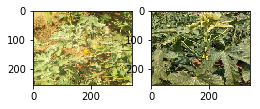

In [34]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
base_path = 'dataset/ds/'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))
for i, img_path in enumerate(random.sample(img_list, 2)):
    img = image.load_img(img_path, target_size=(256, 341))
    img = image.img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [36]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)


Found 114 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [41]:
from keras.applications.resnet152 import ResNet152
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.resnet.ResNet152(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

ImportError: cannot import name 'ResNet152' from 'keras.applications' (D:\anaconda\lib\site-packages\keras\applications\__init__.py)

In [38]:
base_model.trainable = False

In [ ]:
from tensorflow import keras
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])

In [20]:
batch_size = 32
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
print(steps_per_epoch,validation_steps)
history = model.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)

3 0
Epoch 1/10
8/8 [==============================] - 2s 212ms/step - loss: 0.0490 - acc: 0.9737 - val_loss: 0.4412 - val_acc: 0.5455
Epoch 2/10
8/8 [==============================] - 2s 193ms/step - loss: 0.0304 - acc: 0.9649 - val_loss: 0.4079 - val_acc: 0.5455
Epoch 3/10
8/8 [==============================] - 2s 206ms/step - loss: 0.0511 - acc: 0.9912 - val_loss: 0.3964 - val_acc: 0.5455
Epoch 4/10
8/8 [==============================] - 2s 193ms/step - loss: 0.0196 - acc: 0.9912 - val_loss: 0.4122 - val_acc: 0.5455
Epoch 5/10
8/8 [==============================] - 2s 198ms/step - loss: 0.0437 - acc: 1.0000 - val_loss: 0.4421 - val_acc: 0.5455
Epoch 6/10
8/8 [==============================] - 2s 199ms/step - loss: 0.0668 - acc: 0.9737 - val_loss: 0.3967 - val_acc: 0.5455
Epoch 7/10
8/8 [==============================] - 2s 196ms/step - loss: 0.0562 - acc: 0.9737 - val_loss: 0.4131 - val_acc: 0.5455
Epoch 8/10
8/8 [==============================] - 2s 188ms/step - loss: 0.0161 - acc: 

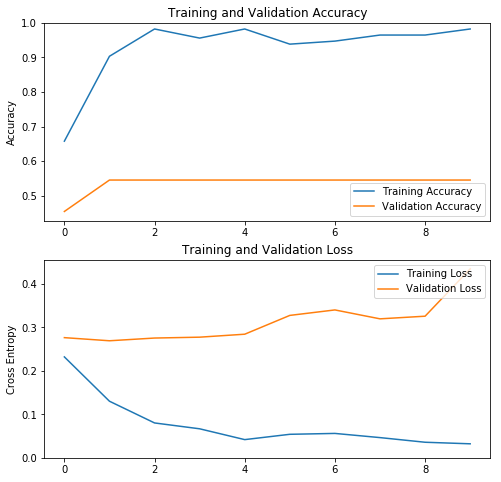

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

## Fine Tuning

In [80]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [81]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_6 ( (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 1,865,154
Non-trainable params: 395,392
_________________________________________________________________


In [82]:
history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=validation_generator, 
                                   validation_steps=validation_steps)

Epoch 1/10
8/8 [==============================] - 6s 706ms/step - loss: 0.1939 - acc: 0.9649 - val_loss: 0.4397 - val_acc: 0.8636
Epoch 2/10
8/8 [==============================] - 1s 100ms/step - loss: 0.1917 - acc: 0.9518 - val_loss: 0.4145 - val_acc: 0.8636
Epoch 3/10
8/8 [==============================] - 1s 133ms/step - loss: 0.2048 - acc: 0.9649 - val_loss: 0.4090 - val_acc: 0.9091
Epoch 4/10
8/8 [==============================] - 1s 128ms/step - loss: 0.1060 - acc: 0.9868 - val_loss: 0.4083 - val_acc: 0.8636
Epoch 5/10
8/8 [==============================] - 1s 136ms/step - loss: 0.2267 - acc: 0.9737 - val_loss: 0.4015 - val_acc: 0.8636
Epoch 6/10
8/8 [==============================] - 1s 137ms/step - loss: 0.1049 - acc: 0.9825 - val_loss: 0.4010 - val_acc: 0.8636
Epoch 7/10
8/8 [==============================] - 1s 136ms/step - loss: 0.2568 - acc: 0.9211 - val_loss: 0.3971 - val_acc: 0.8636
Epoch 8/10
8/8 [==============================] - 1s 138ms/step - loss: 0.2030 - acc: 0.93

In [85]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

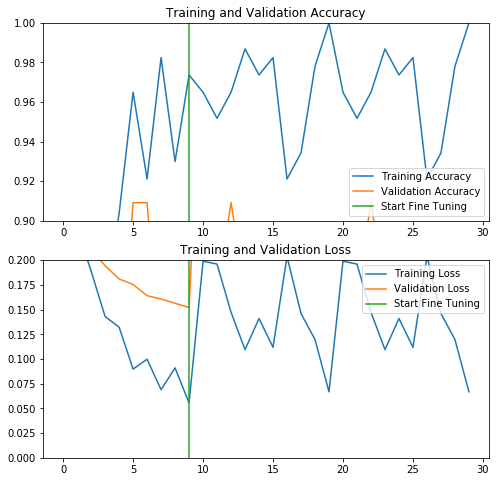

In [86]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()